# Import libraries And load dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pickle

In [4]:
df = pd.read_csv("final_dataset_clean.csv")
df.head()

,label,cleaned_text
0,0,tewk wrote patch wa larg attach http tewk com ...
1,1,http historyguess viagraescapenumb pill escape...
2,0,mike mark creat product issu enron mission cri...
3,1,nice meet visit new onlin pharmaci store save ...
4,1,villela connel langerud houston khan domi prue...


In [5]:
df2 = pd.read_csv("cleaned_dataset.csv")
df2.head()

,label,cleaned_text
0,1,ounc feather bowl hummingbird opec moment alab...
1,1,wulvob medirc onlin qnb ikud viagra escapenumb...
2,0,comput connect cnn com wednesday escapenumb es...
3,1,univers degre obtain prosper futur money earn ...
4,0,thank answer guy know check rsync manual escap...


In [6]:
print(df.shape)
print(df2.shape)

(88454, 2)
(81374, 2)


In [7]:
df = df.dropna()
df = df.reset_index(drop=True)

In [8]:
df.isnull().sum()

label           0
cleaned_text    0
dtype: int64

In [9]:
print(df['label'].value_counts())
print(df2['label'].value_counts())

label
1    46855
0    41597
Name: count, dtype: int64
label
1    43449
0    37925
Name: count, dtype: int64


# Vectorization

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [11]:
# For original + Synthetic dataset
x = df['cleaned_text']
X = tfidf.fit_transform(x)
y = df['label'].values

# For original dataset
x2 = df2['cleaned_text']
X2 = tfidf.transform(x2)
y2 = df2['label'].values

# Training and Testing

In [12]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=10)
X2train, X2test, y2train, y2test = train_test_split(X2, y2, test_size=0.25, random_state=10)

In [13]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# Finding Best Predective Model

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [15]:
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [16]:
clfs = {
    'SVC' : svc,
    'NB': mnb,  
    'LR': lrc, 
    'RF': rfc, 
}

In [15]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    
    return accuracy,precision

In [16]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, Xtrain,ytrain,Xtest,ytest)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9795143128476462
Precision -  0.9796512221865431
For  NB
Accuracy -  0.9550490661601773
Precision -  0.9547531015642519
For  LR
Accuracy -  0.9767105322660878
Precision -  0.9771953598040954
For  RF
Accuracy -  0.9761678650567539
Precision -  0.9757597386790234


In [17]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [18]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.979514,0.979651
2,LR,0.976711,0.977195
3,RF,0.976168,0.975760
1,NB,0.955049,0.954753


# **So best Predictive Model is SVC**

# Training and Prediction with SVC

**For original + Synthetic dataset**

In [18]:
svc1 = SVC(kernel='sigmoid', gamma=1.0)
svc1.fit(Xtrain, ytrain)

SVC(gamma=1.0, kernel='sigmoid')

In [22]:
ypred_test = svc1.predict(Xtest)
ypred_train = svc1.predict(Xtrain)

**For original dataset**

In [26]:
svc2 = SVC(kernel='sigmoid', gamma=1.0)
svc2.fit(X2train, y2train)

SVC(gamma=1.0, kernel='sigmoid')

In [27]:
y2pred_train = svc2.predict(X2train)
y2pred_test = svc2.predict(X2test)

# Confusion Matrix

**For original + Synthetic Test dataset**

In [23]:
cm = np.array(confusion_matrix(ytest, ypred_test))
cm

array([[10109,   264],
       [  189, 11551]])

<Axes: >

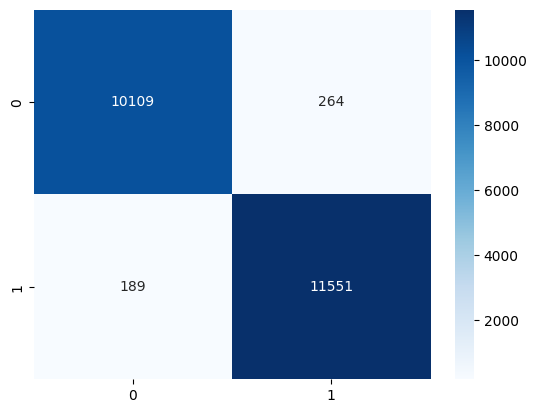

In [24]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap='Blues', fmt='g')

**For original Test dataset**

In [28]:
cm2 = np.array(confusion_matrix(y2test, y2pred_test))
cm2

array([[ 9184,   184],
       [   71, 10905]])

<Axes: >

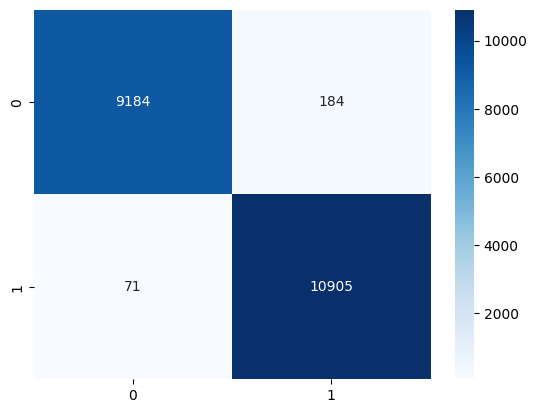

In [29]:
sns.heatmap(pd.DataFrame(cm2), annot=True, cmap='Blues', fmt='g')

**For original + Synthetic Train dataset**

In [30]:
cm3 = np.array(confusion_matrix(ytrain, ypred_train))
cm3

array([[30782,   442],
       [  379, 34736]])

<Axes: >

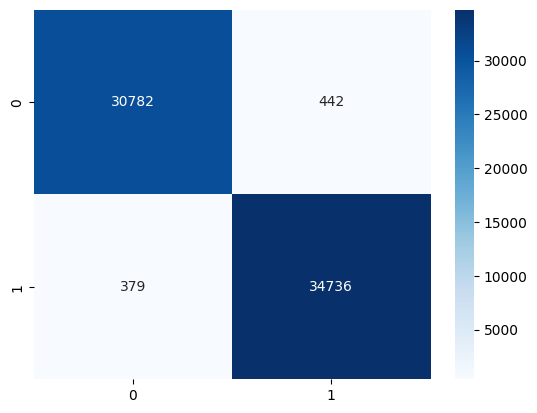

In [31]:
sns.heatmap(pd.DataFrame(cm3), annot=True, cmap='Blues', fmt='g')

**For original Train dataset**

In [32]:
cm4 = np.array(confusion_matrix(y2train, y2pred_train))
cm4

array([[28236,   321],
       [  100, 32373]])

<Axes: >

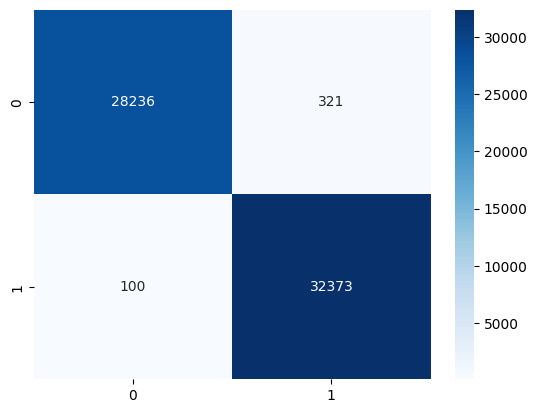

In [33]:
sns.heatmap(pd.DataFrame(cm4), annot=True, cmap='Blues', fmt='g')

In [34]:
# Save trained best-performing model (SVC)
with open("best_model_svc.pkl", "wb") as model_file:
    pickle.dump(svc1, model_file)

# Save fitted TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as vec_file:
    pickle.dump(tfidf, vec_file)
